In [28]:
pip install dash plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB 660.6 kB/s eta 0:00:12
    --------------------------------------- 0.1/7.9 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.9 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.3/7.9 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.9 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.9 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.9 MB 1.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/7.9 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/7.9 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.7/7.9 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/7.9 MB 1.5 MB/s eta 0:00:05
   ---- -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [48]:
import yfinance as yf
import pandas as pd

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [53]:
import pandas as pd
import requests
from io import StringIO

# Step 1: Get HTML with headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text

# Step 2: Parse tables from HTML
tables = pd.read_html(StringIO(html))

# Step 3: Find the table with 'Tesla Quarterly Revenue'
for table in tables:
    if "Tesla Quarterly Revenue" in table.columns or table.columns.str.contains("Revenue").any():
        tesla_revenue = table.copy()
        break

# Step 4: Clean the table
tesla_revenue = tesla_revenue.iloc[:, :2]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"].str.contains("\$")]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Step 5: Show last 5 rows
tesla_revenue.tail()


,Date,Revenue
11,2013,2013.0
12,2012,413.0
13,2011,204.0
14,2010,117.0
15,2009,112.0


In [54]:
import yfinance as yf
import pandas as pd

# Step 1: Get GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Step 2: Show first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [55]:
import requests
from io import StringIO

# Step 1: Scrape GME revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
tables = pd.read_html(StringIO(html))

# Step 2: Extract and clean
for table in tables:
    if table.shape[1] >= 2 and table.columns.str.contains("Revenue").any():
        gme_revenue = table.copy()
        break

gme_revenue = gme_revenue.iloc[:, :2]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"].str.contains("\$")]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Step 3: Show last 5 rows
gme_revenue.tail()


,Date,Revenue
12,2013,8887.0
13,2012,9551.0
14,2011,9474.0
15,2010,9078.0
16,2009,8806.0


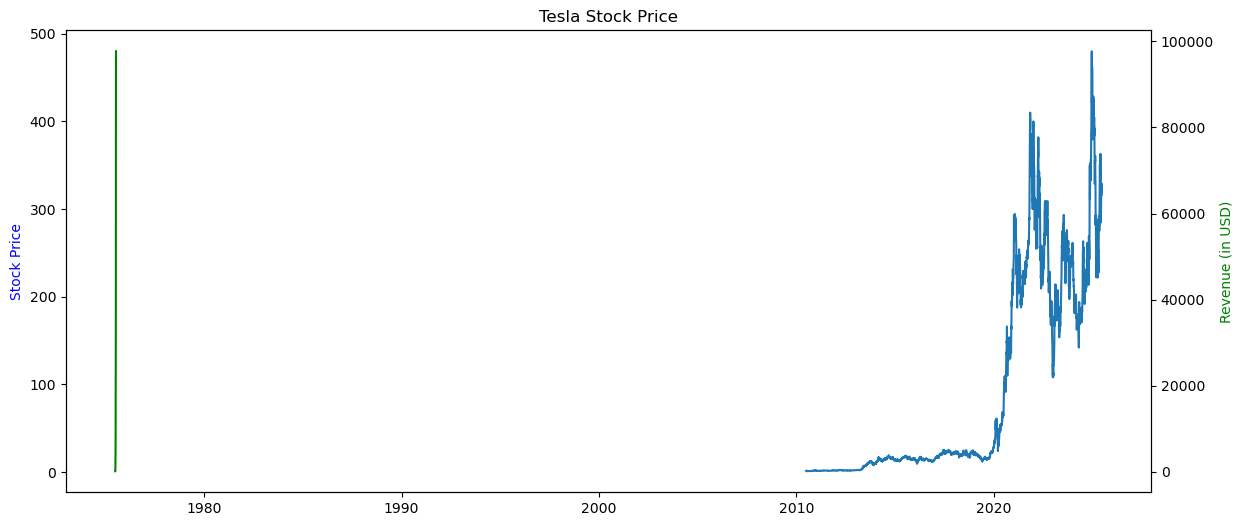

In [56]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.set_title(f"{stock_name} Stock Price")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green')
    ax2.set_ylabel('Revenue (in USD)', color='green')

    plt.show()

# Plot Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")


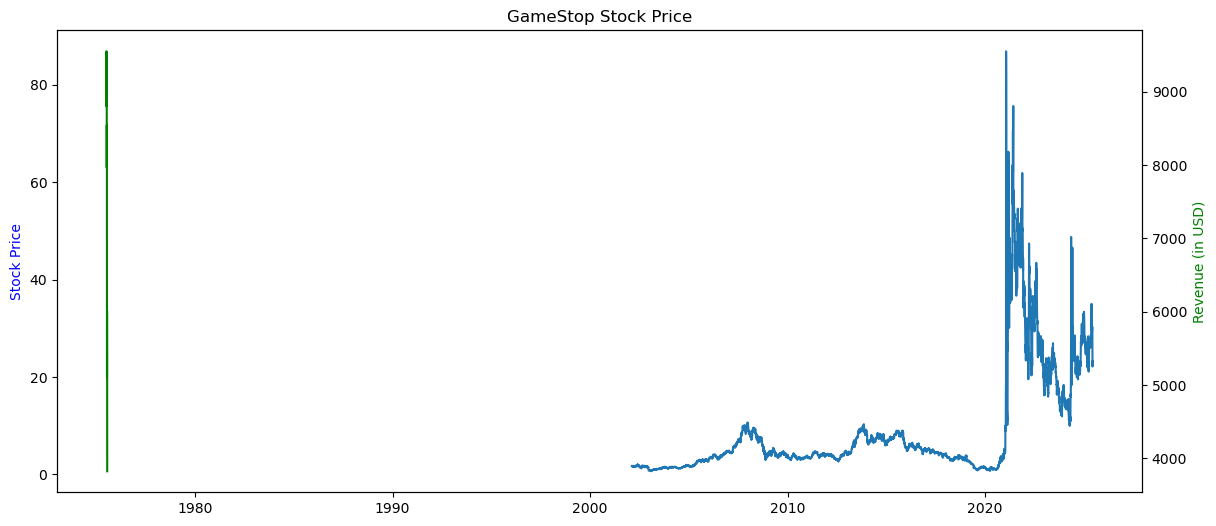

In [57]:
# Plot GME
make_graph(gme_data, gme_revenue, "GameStop")
